### **EDA - Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA LOADED ✔
Shape: (180, 15)

HEAD:
   patient_id  heart_disease_present  slope_of_peak_exercise_st_segment  \
0     0z64un                      0                                  1   
1     ryoo3j                      0                                  2   
2     yt1s1x                      1                                  1   
3     l2xjde                      1                                  1   
4     oyt4ek                      0                                  3   

                thal  resting_blood_pressure  chest_pain_type  \
0             normal                     128                2   
1             normal                     110                3   
2             normal                     125                4   
3  reversible_defect                     152                4   
4  reversible_defect                     178                1   

   num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                  0                                     0   
1

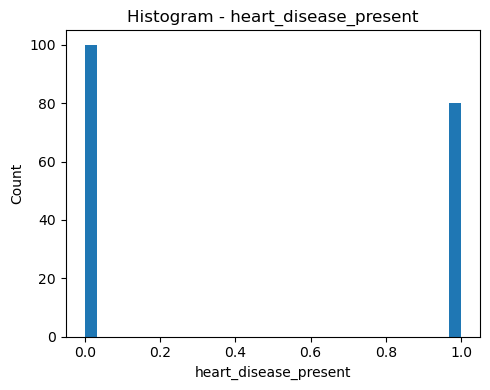

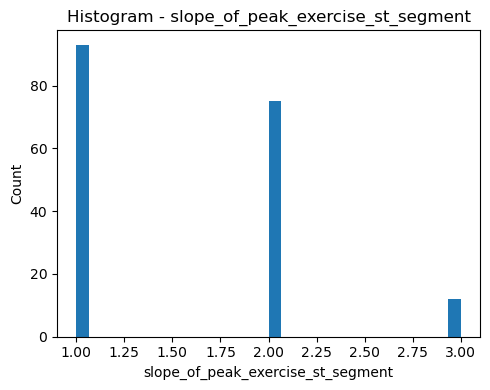

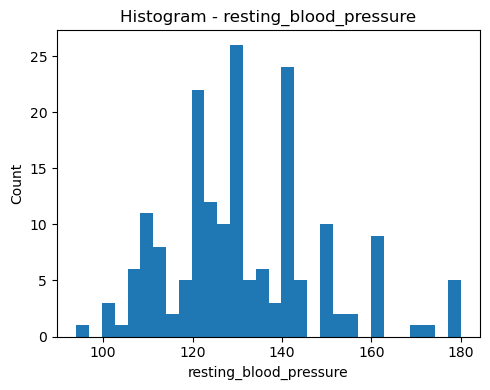

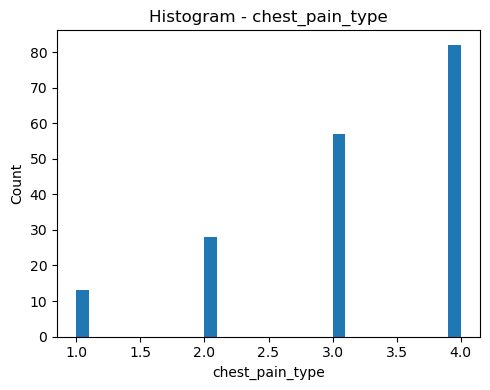

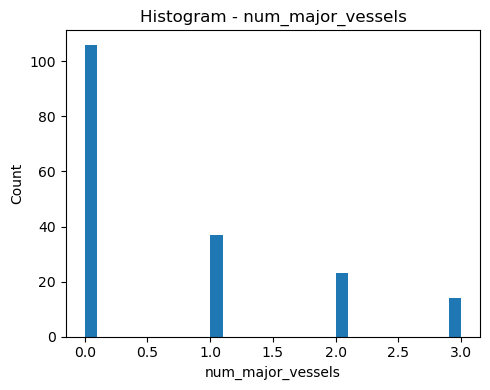

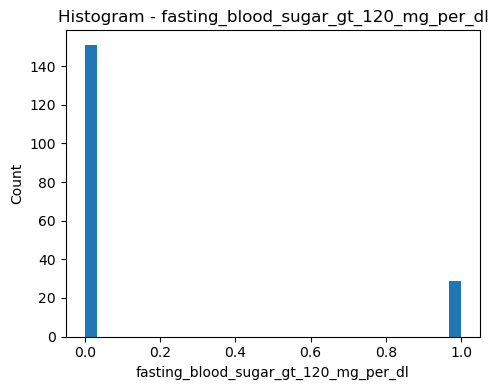

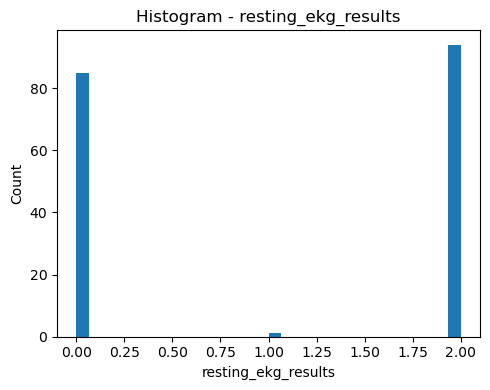

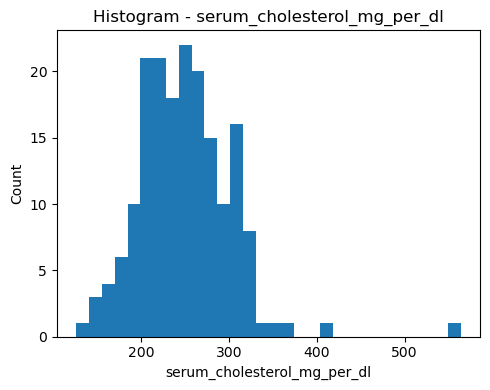

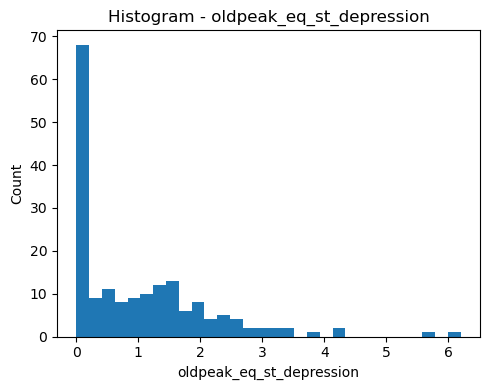

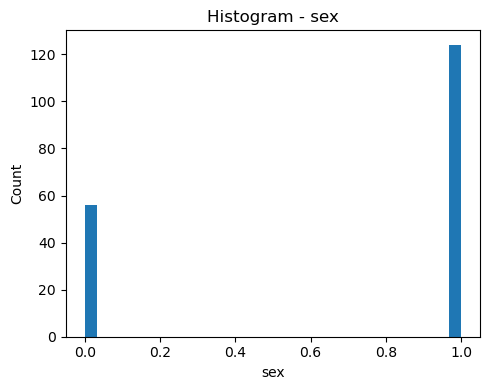

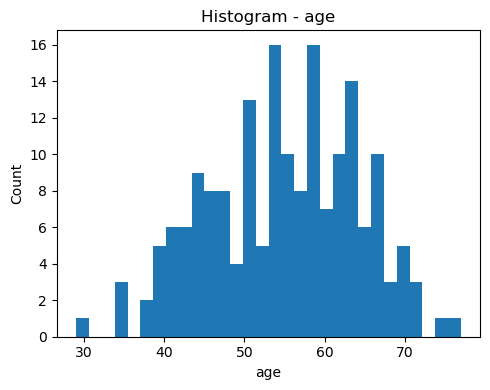

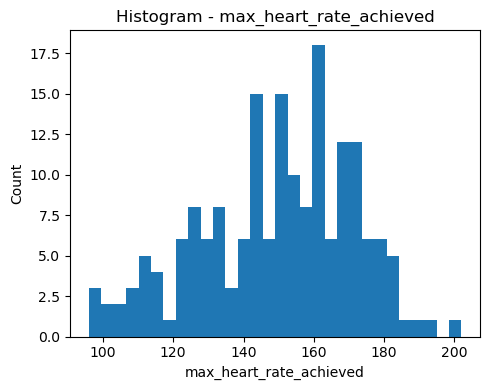

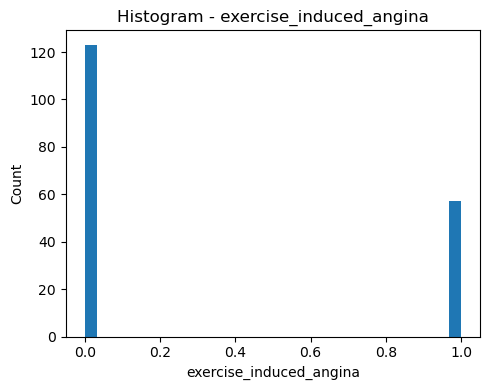

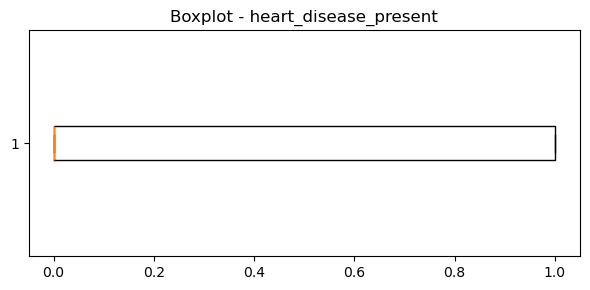

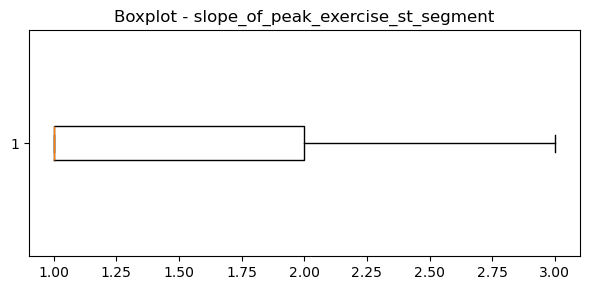

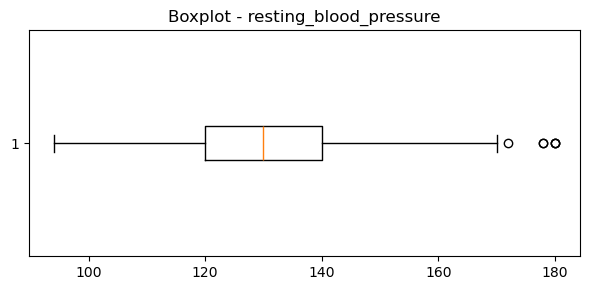

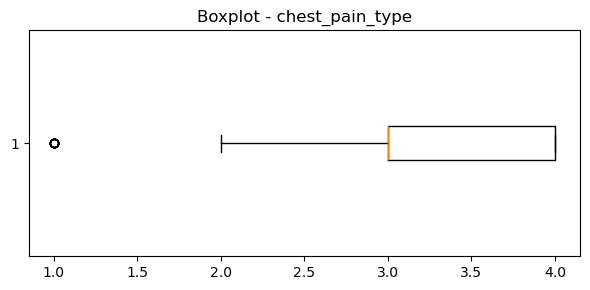

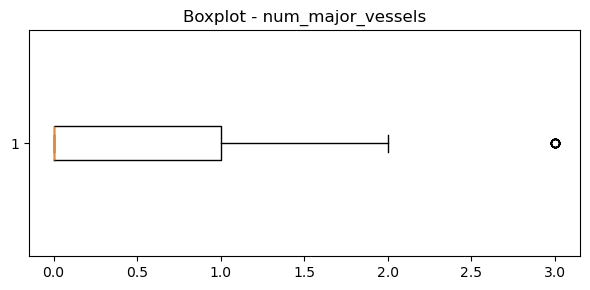

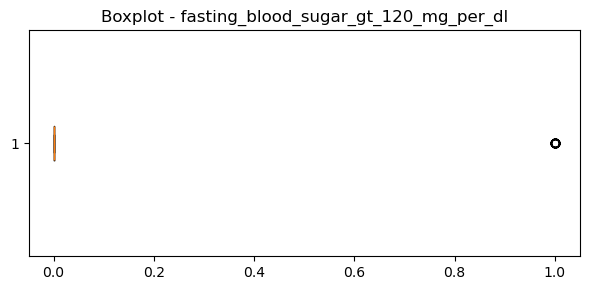

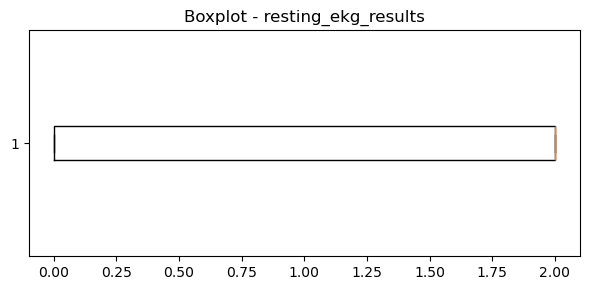

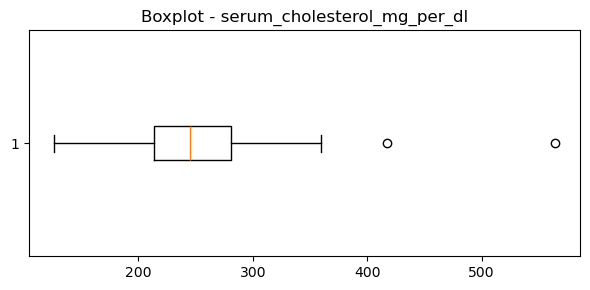

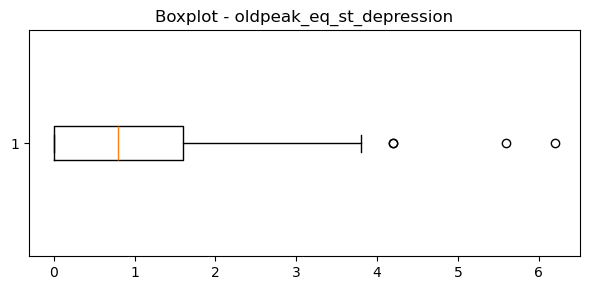

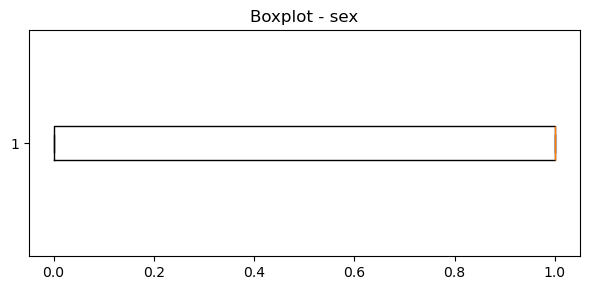

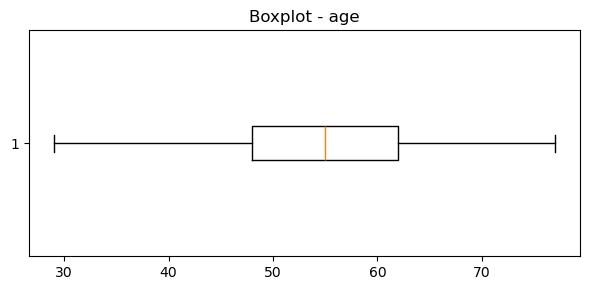

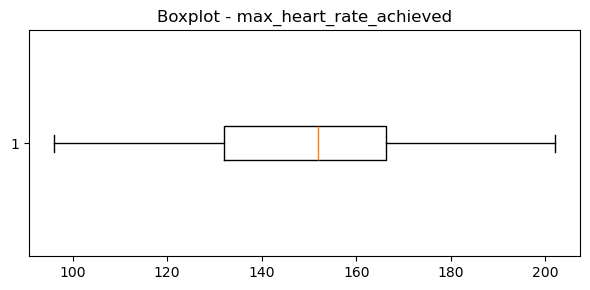

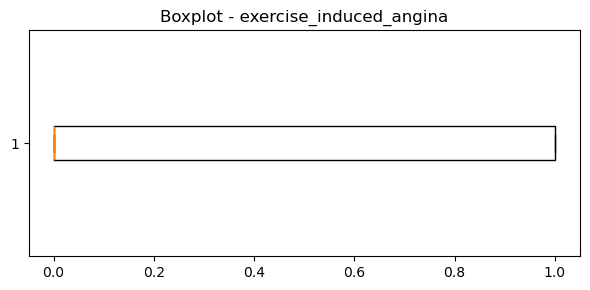

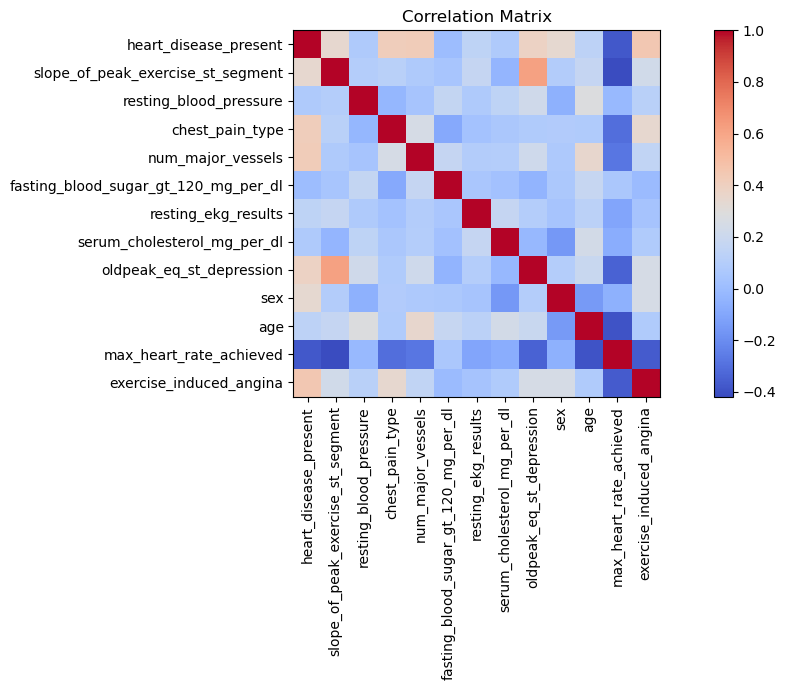


TARGET COLUMN DETECTED: heart_disease_present
heart_disease_present
0    100
1     80
Name: count, dtype: int64
EDA COMPLETED SUCCESSFULLY


In [2]:
# LOAD DATA
df = pd.read_csv(r"C:\Users\Sanjana\Downloads\final_cleaned.csv")
print("DATA LOADED ✔")
print("Shape:", df.shape)

# FIRST & LAST ROWS
print("\nHEAD:\n", df.head())
print("\nTAIL:\n", df.tail())

# COLUMNS
print("\nCOLUMNS:\n", df.columns.tolist())

# DTYPES
print("\nDTYPES:\n", df.dtypes)

# INFO
print("\nINFO:")
print(df.info())

# MISSING VALUES
print("\nMISSING VALUES:")
missing = df.isnull().sum()
missing_percent = (missing / len(df))*100
print(pd.DataFrame({"missing": missing, "percent": missing_percent}))

# DUPLICATES
print("\nDUPLICATES:", df.duplicated().sum())

# NUMERIC SUMMARY
print("\nNUMERIC SUMMARY:")
print(df.describe().T)

# CATEGORICAL SUMMARY
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCATEGORICAL COLUMNS:", list(cat_cols))

for col in cat_cols:
    print(f"\n{col} → {df[col].nunique()} unique values")
    print(df[col].value_counts().head(10))

# HISTOGRAMS
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(5,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# BOX PLOTS (OUTLIERS)
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.show()

# CORRELATION MATRIX
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(12,7))
    plt.imshow(corr, cmap="coolwarm")
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# TARGET DISTRIBUTION (IF EXISTS)
target_cols = [c for c in df.columns if 'target' in c.lower() or 
               'label' in c.lower() or 
               'disease' in c.lower() or 
               'class' in c.lower()]

if target_cols:
    print("\nTARGET COLUMN DETECTED:", target_cols[0])
    print(df[target_cols[0]].value_counts())

print("EDA COMPLETED SUCCESSFULLY")
